In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pranjalyadav92905/titanic-eda-data")

print("Path to dataset files:", path)

Path to dataset files: /home/mohsinkhan/.cache/kagglehub/datasets/pranjalyadav92905/titanic-eda-data/versions/1


In [4]:
dataset_path = "/home/mohsinkhan/.cache/kagglehub/datasets/pranjalyadav92905/titanic-eda-data/versions/1"
print(os.listdir(dataset_path))

['titanic.csv']


In [5]:
file_path = "/home/mohsinkhan/.cache/kagglehub/datasets/pranjalyadav92905/titanic-eda-data/versions/1/titanic.csv"
df =  pd.read_csv(file_path)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# Group rare titles
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare',
    'Major': 'Rare', 'Lady': 'Rare', 'Sir': 'Rare',
    'Capt': 'Rare', 'Countess': 'Rare', 'Don': 'Rare',
    'Jonkheer': 'Rare', 'Dona': 'Rare'
})

# Drop original Name column if not done yet
df.drop('Name', axis=1, inplace=True)

In [9]:
#removing null value i thing is not a good approch  since it remove most of row

In [10]:
df.drop(['Ticket','Cabin'], axis=1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0])


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [13]:
df['Age'].fillna(df['Age'].median(), inplace = True)

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_230/3612560828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [15]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'the Countess'],
      dtype=object)

In [16]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked', 'Title'], drop_first = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Fare                891 non-null    float64
 7   Sex_male            891 non-null    bool   
 8   Embarked_Q          891 non-null    bool   
 9   Embarked_S          891 non-null    bool   
 10  Title_Miss          891 non-null    bool   
 11  Title_Mr            891 non-null    bool   
 12  Title_Mrs           891 non-null    bool   
 13  Title_Rare          891 non-null    bool   
 14  Title_the Countess  891 non-null    bool   
dtypes: bool(8), float64(2), int64(5)
memory usage: 55.8 KB


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression(solver='saga', max_iter=2000)
model.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))


Accuracy Score:  0.8100558659217877
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


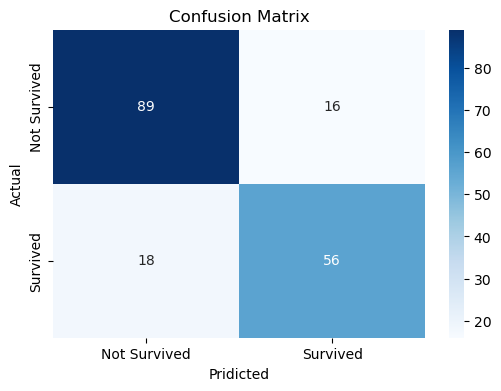

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Pridicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

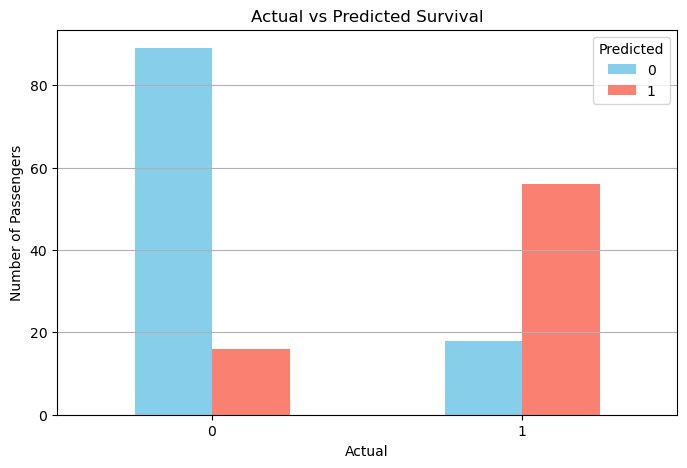

In [27]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
survival_counts = comparison_df.value_counts().unstack()

survival_counts.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'salmon'])

plt.title('Actual vs Predicted Survival')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_230/431476589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


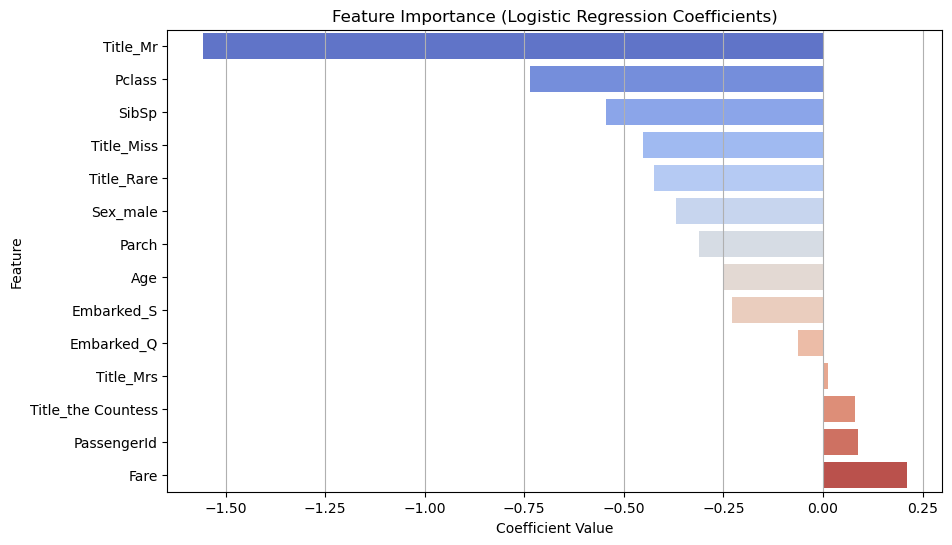

In [29]:
# Assuming you used scaled features
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]
coefficients = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()
